In [16]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
%matplotlib inline


In [17]:
# import the farmingham data
df = pd.read_csv("framingham.csv")
#Shape of dataset
print ('No. of Records :', df.shape[0], '\nNo. of Features : ', df.shape[1])

No. of Records : 4240 
No. of Features :  17


In [18]:
# identify the data type
df.dtypes

ID                   int64
male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [19]:
# identify any null values
df.count()
print(df.isna().sum())

ID                   0
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


## About 11% are null values so we have not decided yet to drop.

In [20]:
# check for any duplicates
duplicate_df = df[df.duplicated()]
duplicate_df

,ID,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [21]:
df = df.drop(['ID'], axis=1)

In [22]:
df.head(-1)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


#### 1. Find correlation between all the health conditions from the data sets.
#### 2. Identify the outliers from the correlations
#### 3. Graph Gender VS 10 year CHD
#### 4. Graph Education impact on 10 year CHD
#### 5. Graph smokers per day VS 10 year CHD
#### 6. Graph each outliers VS 10 year CHD
#### 7. Graph each outliers that are out of normal range and and plot it VS 10 year CHD
#### 8. Calculate each outliers that are out of normal range and show the percentage of population developed CHD
#### 9. Analyze step 8 to see the patterned of the percentage of population developed CHD in 10 years.
#### 10. Conclusion - If you give me your actual number for each outliers, i can maybe predict percentage of you developing CHD in 10 years.

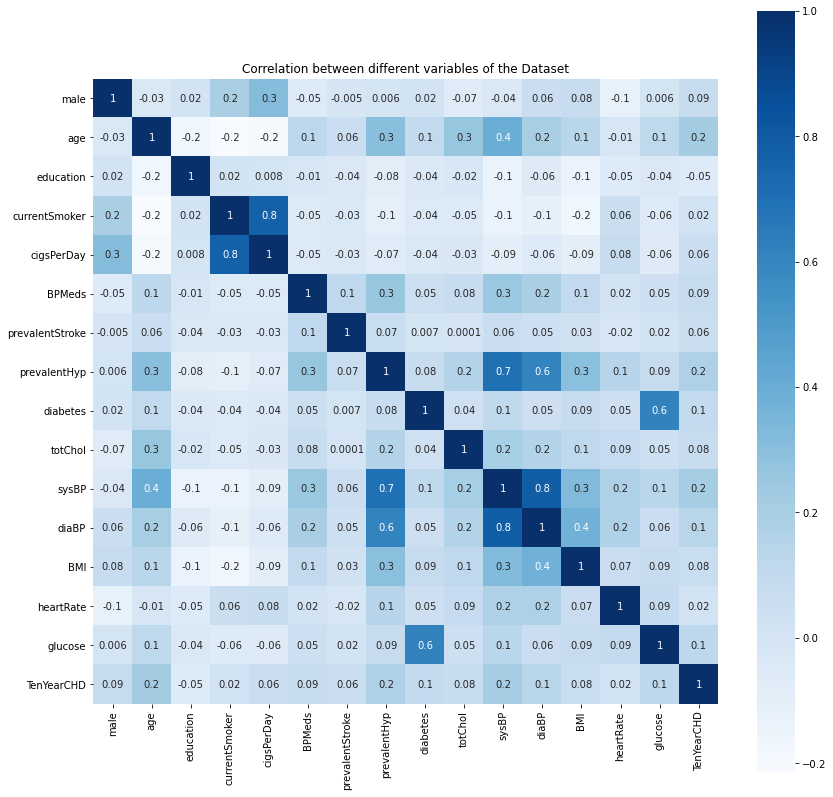

In [23]:
## Checking the correlation between output and input fields through a heatmap by the help of correlation function

correlation = df.corr()
plt.figure(figsize=(14,14))
g = sns.heatmap(correlation, vmax=1, square=True,cmap='Blues',annot= True,xticklabels=True,yticklabels=True, fmt='.1g')
g.set_yticklabels(g.get_yticklabels(), rotation =0)
g.set_xticklabels(g.get_yticklabels(), rotation =90)
plt.title('Correlation between different variables of the Dataset')

plt.savefig("static/Correlation between different fearures.png")

#### Obervation: Currentsmoker & Cigsperday has strong correlations. PrevalentHyp vs SysBP/diaBP,  Glucos vs Diabetes, and sysBP & diaBP also have Positive correlations.

#### We are dropping the column Education becasue it does not really have any correlation with risk of developing heart disease. #### Obervation: Currentsmoker & Cigsperday has strong correlations. PrevalentHyp vs SysBP/diaBP, Glucos vs Diabetes, and sysBP & diaBP also have Positive correlations

### there is 12%of null values so we decided to fill null value with Mean

In [24]:
#User defined function for missing value imputation
def impute_median(data):
    return data.fillna(data.median())
#median imputation - fill the null values with mean

df.glucose = df['glucose'].transform(impute_median)
df.education = df['education'].transform(impute_median)
df.heartRate = df['heartRate'].transform(impute_median)
df.totChol = df['totChol'].transform(impute_median)
df.BPMeds = df['BPMeds'].transform(impute_median)

## group by classes that are in relation with other classes

by_currentSmoker = df.groupby(['currentSmoker'])
df.cigsPerDay = by_currentSmoker['cigsPerDay'].transform(impute_median)

by_age = df.groupby(['male','age'])
df.BMI = by_age['BMI'].transform(impute_median)

In [25]:
#Shape of dataset
print ('No. of Records :', df.shape[0], '\nNo. of Features : ', df.shape[1])

No. of Records : 4240 
No. of Features :  16


In [26]:
# Export the clean data to CSV
df.to_csv('framingham_cleandata.csv')

In [27]:
#  describe the data
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,9.081132,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.798756,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.916119,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.072774,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.397500,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


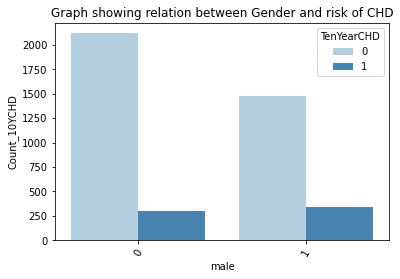

In [28]:
#  Plot CHD vs gender
df['Count_10YCHD'] = 1
# create pivot table to count how many female and male are TenYearCHD positive and negative and graph it
gender_pv_df = df.pivot_table('Count_10YCHD', ['male', 'TenYearCHD'], aggfunc="sum").reset_index()
# plot the bar graph to show probabilities by Gender
gender_bar = sns.barplot(x="male", y="Count_10YCHD", hue="TenYearCHD", palette="Blues",data=gender_pv_df)
gender_bar.set_title('Graph showing relation between Gender and risk of CHD')
plt.setp(gender_bar.get_xticklabels(), rotation=60)
legend = gender_bar.get_legend()
legend.set_bbox_to_anchor((1, 1))


#### Observation: Approximatey 12.29% of women and 18.92% of men are positive for CHD. According to the data sets, male have sown little higher risk of CHD.


In [29]:
# 12.29% of female population has developed CHD in 10 years
# 18.92% of male population has developed CHD in 10 years
gender = df.loc[:, ["male" , "TenYearCHD",]]
male_no = gender.loc[gender["male"] == "Male"]
male_positive = male_no.loc[male_no["TenYearCHD"] == "positive"]
female_no = gender.loc[gender["male"] == "Female"]
female_positive = female_no.loc[female_no["TenYearCHD"] == "positive"]
positive_male = (male_positive.count()/male_no.count())*100
positive_female = (female_positive.count()/female_no.count())*100


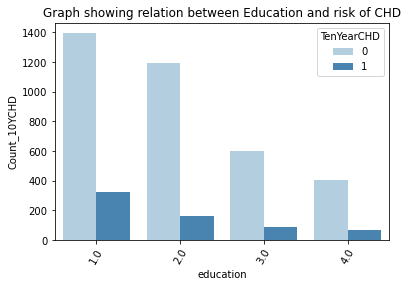

In [30]:
# let's check if education is relevant - do step 53 and 54 to create pivot table and graph it.
# create pivot table to show education vs Ten Year CHD in the dataset

education_pv_df = df.pivot_table('Count_10YCHD', ['education', 'TenYearCHD'], aggfunc="sum").reset_index()
# plot the bar graph to show probabilities by Education - add % of people had lower education
education_bar = sns.barplot(x="education", y="Count_10YCHD", hue="TenYearCHD", palette="Blues",data=education_pv_df)
education_bar.set_title('Graph showing relation between Education and risk of CHD')
plt.setp(education_bar.get_xticklabels(), rotation=60)
legend = education_bar.get_legend()
legend.set_bbox_to_anchor((1, 1))

#### Observation: 1.64% of college education developed CHD, 2% of some college education developed CHD, 3.58% of High school or GED education  developed  CHD, and 7.8% of some high school developed CHD. 

In [31]:
education = df.loc[:, ["education" , "TenYearCHD",]]
college_no = education.loc[education["education"] == "College"]
college_positive = college_no.loc[college_no["TenYearCHD"] == "positive"]
some_college_no = education.loc[education["education"] == "Some college or Vocational School"]
somecollege_positive = some_college_no.loc[some_college_no["TenYearCHD"] == "positive"]
High_GEDNo = education.loc[education["education"] == "High School or GED"]
High_GEDNo_positive = High_GEDNo.loc[High_GEDNo["TenYearCHD"] == "positive"]
somehisch_no = education.loc[education["education"] == "Some High School"]
somehischo_positive = somehisch_no.loc[somehisch_no["TenYearCHD"] == "positive"]
college_positive_per = (college_positive.count()/education.count())*100
somecollege_positive_per = (somecollege_positive.count()/education.count())*100
High_GEDNo_positive_per = (High_GEDNo_positive.count()/education.count())*100
somehischo_positive_per = (somehischo_positive.count()/education.count())*100


In [32]:
# let's check which age group and gender smoke more.
# to do this, we need to create the agegroup range bins.follow steps 53 and 54 again and graph it
df['age'].unique()
# lets set the Ages range from max age 32 to 70 to create groups
df['AgeGroup'] = pd.cut(x=df['age'], bins = [30 , 39, 49, 59, 70],
                              labels=['30-39 years', '40-49 years', '50-59 years', '60-70years'])
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Count_10YCHD,AgeGroup
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,30-39 years
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,40-49 years
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,40-49 years
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,1,60-70years
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1,40-49 years


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

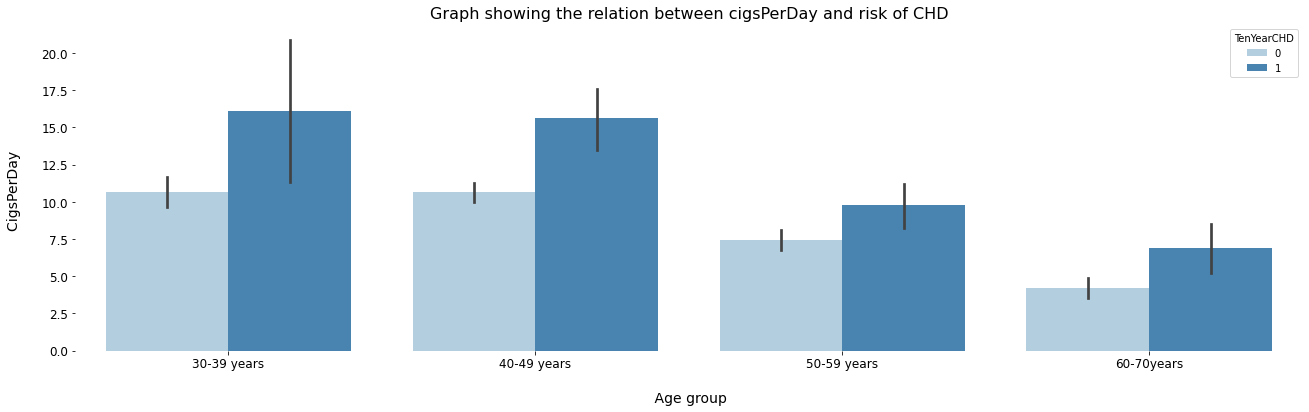

In [33]:
# create pivot table to show smokers vs Ten-Year-CHD
plt.figure(figsize=(22,6))
smoker_bar = sns.barplot(x="AgeGroup", y="cigsPerDay", hue="TenYearCHD", data=df, palette = "Blues")
plt.box(False)
plt.title('Graph showing the relation between cigsPerDay and risk of CHD', fontsize=16)
plt.xlabel('\n Age group', fontsize=14)
plt.ylabel('CigsPerDay \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#### Observation: Age group 30-39 years shows higher number of cigs per day and more positive for CHD. Low cigsPerDay shows lower risk of CHD.

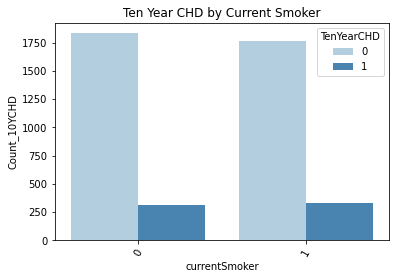

In [34]:
# show smokers by CHD
smokers_pv_df = df.pivot_table('Count_10YCHD', ['currentSmoker', 'TenYearCHD'], aggfunc="sum").reset_index()
# smokers_pv_df = clean_df.pivot_table('Count_10YCHD', ['Current-Smoker', 'Ten-Year-CHD'], aggfunc="sum").reset_index()
smoker_bar = sns.barplot(x="currentSmoker", y="Count_10YCHD", hue="TenYearCHD", palette="Blues", data=smokers_pv_df)
smoker_bar.set_title('Ten Year CHD by Current Smoker')
plt.setp(smoker_bar.get_xticklabels(), rotation=60)
legend = smoker_bar.get_legend()
legend.set_bbox_to_anchor((1, 1))


#### Observation: About 15.93% people who smoked were positive for CHD.  Also 14.55% people who did not smoke but were also positive for CHD. 

In [35]:
# Calculate what percentage of smoked and developed CHD in the age group
# Total smokers:7.79% patient smoked
tot_smoker = df.loc[:, ["currentSmoker" , "TenYearCHD",]]
tot_smoker_yes = tot_smoker.loc[tot_smoker["currentSmoker"] == "Yes"]
# tot_smoker_per = (tot_smoker_yes.count()/tot_smoker.count())*100
# smoker percentage 15.93% were positive for CHD
smoker = df.loc[:, ["currentSmoker" , "TenYearCHD",]]
smoker_yes = smoker.loc[smoker["currentSmoker"] == "Yes"]
smoker_positive = smoker_yes.loc[smoker_yes["TenYearCHD"] == "positive"]
smoker_percent = (smoker_positive.count()/tot_smoker_yes.count())*100
# 85.45% patient who smoked were negative for CHD
# smoker_yes_neg = smoker.loc[smoker["Current-Smoker"] == "Yes"]
# smoker_CHD_neg = smoker_yes_neg.loc[smoker_yes_neg["Ten-Year-CHD"] == "negative"]
# smoker_neg_percent = (smoker_CHD_neg.count()/smoker_yes_neg.count())*100
# 14.55 % did not smoke but they were positive for CHD
no_smoker = smoker.loc[smoker["currentSmoker"] == "No"]
no_smoker_positive = no_smoker.loc[no_smoker["TenYearCHD"] == "positive"]
no_smoker_positive_per = (no_smoker_positive.count()/no_smoker.count())*100
no_smoker_positive_per

currentSmoker   NaN
TenYearCHD      NaN
dtype: float64

#### Observation: 11% of female smoker patients are risk of CHD vs about 20% of male smokers are risk of CHD

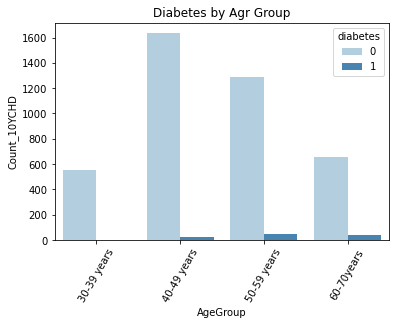

In [36]:
# let's check relationship between Diabetes in the incidence of heart disease.
# show Diabetes vs Ten Year CHD
diabetes_pv_df = df.pivot_table('Count_10YCHD', ['AgeGroup', 'diabetes'], aggfunc="sum").reset_index()
# plot the bar graph 
diabetes_bar = sns.barplot(x="AgeGroup", y="Count_10YCHD", hue="diabetes", palette="Blues",data=diabetes_pv_df)
diabetes_bar.set_title('Diabetes by Agr Group')
plt.setp(diabetes_bar.get_xticklabels(), rotation=60)
legend = diabetes_bar.get_legend()
legend.set_bbox_to_anchor((1, 1))


#### Observation: Approximatley .96% patients were positive for CHD who has Diabetes. About 14.27% people who had diabetes did not developed CHD.

In [37]:
# show percentage of people who had Diabetes and they were positive for CHD
diabetes = df.loc[:, ["diabetes" , "TenYearCHD",]]
diabetes_yes = diabetes.loc[diabetes["diabetes"] == "Yes"]
diabetes_positive = diabetes_yes.loc[diabetes_yes["TenYearCHD"] == "positive"]
diabetes_positive_per = (diabetes_positive.count()/diabetes.count())*100
# show percentage of people who did not have Diabetes and they were positive for CHD
no_diabetes = diabetes.loc[diabetes["diabetes"] == "No"]
no_diabetes_positive = no_diabetes.loc[no_diabetes["TenYearCHD"] == "positive"]
no_diabetes_positive_per = (no_diabetes_positive.count()/diabetes.count())*100


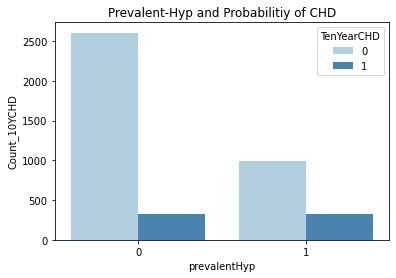

In [38]:
# show Prevalent-Hyp in total dataset against CHD
hyp_pv_df = df.pivot_table('Count_10YCHD', ['prevalentHyp', 'TenYearCHD'], aggfunc="sum").reset_index()
hyp_bar = sns.barplot(data = hyp_pv_df, x="prevalentHyp", y="Count_10YCHD", palette="Blues",hue="TenYearCHD")
hyp_bar.set_ylabel('Count_10YCHD')
legend = hyp_bar.get_legend()
legend.set_bbox_to_anchor((1, 1))
hyp_bar.set_title('Prevalent-Hyp and Probabilitiy of CHD')
legend = hyp_bar.get_legend()
legend.set_bbox_to_anchor((1, 1))



FileNotFoundError: [Errno 2] No such file or directory: 'Template/Resources/assets/images/totcholbyagegroup.png'

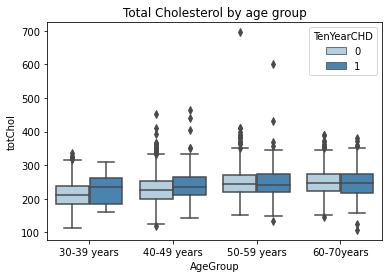

In [39]:
# same plot as cell 177
chol_plot = sns.boxplot(x="AgeGroup", y="totChol", hue = "TenYearCHD", palette="Blues",data=df)
chol_plot.set_title('Total Cholesterol by age group')
plt.savefig("Template/Resources/assets/images/totcholbyagegroup.png")

In [ ]:
# compare Glucose to CHD
# show Glucose in total dataset against CHD
# visualizing feature selection
plt.figure(figsize=(10,5))
glucose_bar = sns.barplot(x= df['TenYearCHD'], y= df['glucose'], data=df, palette = "GnBu_d")
plt.title('Graph showing relation between Glucose and risk of CHD', fontsize=16)
plt.xlabel('\n Ten-Year-CHD', fontsize=14)
plt.ylabel('Glucose \n', fontsize=14)
legend = glucose_bar.get_legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
# show what percentage of population were positive for CHD
plt.figure(figsize=(8,8))
plt.pie(df['TenYearCHD'].value_counts(), labels=['Neg.','Pos.'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=["blue","lightblue"])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

plt.savefig("Template/Resources/assets/images/CHDPositive&NegativeCount.png")

#### Observations: The distribution is highly imblanced. As in number of negative cases outweight the number of positive cases.

In [ ]:
#  Show relation between sysBP and risk of CHD
plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=df["TenYearCHD"], y=df["sysBP"], palette="Blues")
plt.title("Graph showing relation between sysBP and risk of CHD", size=20)
plt.ylabel("Systolic Blood Pressure",size=20)
plt.xlabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

#  Show relation between diaBP and risk of CHD
plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=df["TenYearCHD"], y=df["diaBP"],palette="Blues")
plt.title("Graph showing relation between diaBP and risk of CHD", size=20)
plt.ylabel("Diastolic Blood Pressure",size=20)
plt.xlabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)


#### Observation: high systolic shows slightly higher risk of CHD. Majority of people who has sysBP between 72-130 has lower risk of CHD. Majority of people with diaBP ranging upto 80.0 shows lower resk of CHD.

In [ ]:
# Check for candidates with Glucose >300 (considered the Glucose factor as an outlier) 
#### note for the group: I uset boxplot!
sns.boxplot(df.glucose,color='blue')
Outlier_sysBP = df[(df['glucose'] > 300)] 
# calculate what percentage of population has Glucose level of 300 and they developed CHD in 10 years


In [ ]:
# Look for candidates with sysBP higher than 220 (BP>220 is considered as an outlier)
sns.boxplot(df['sysBP'],color='purple')
Outlier_sysBP = df[(df['sysBP'] > 220)] 


#### Calculate what percentage of population has high HPY and were positive for CHD

In [ ]:
# plot Blood Pressure by age group
bprate_plot1 = sns.boxplot(x="AgeGroup", y="sysBP",data=df)
bprate_plot2 = sns.boxplot(x="AgeGroup", y="diaBP",data=df,palette="Blues",linewidth=2.5)
bprate_plot1.set_title('BP by age group')



In [ ]:
# plot Heart rate by age group
heart_plot = sns.boxplot(x="AgeGroup", y="heartRate",data=df,palette="Set3",linewidth=2.5)
heart_plot.set_title('Heart Rate by age group')


In [ ]:

# plot Glucose by age group
glucose_plot = sns.boxplot(x="AgeGroup", y="glucose", data=df)
glucose_plot.set_title('Total Glucose by age group')

In [ ]:
# plot BMI by age group
bmi_plot = sns.boxplot(x="AgeGroup", y="BMI", data=df)
bmi_plot.set_title('Total BMI by age group')

#### Veronika Patel

In [ ]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df)
plt.show()